In [1]:
# -*- coding: utf-8 -*-
"""
"""
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import neighbors, datasets
from sklearn.preprocessing import StandardScaler


import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

import pandas as pd

np.random.seed(123)

In [4]:
# Load data from csv file

path  = "C:\\Users\\annaresh\\Downloads\\digitsdata.csv"

data_labels = pd.read_csv(path)

print(data_labels.shape)

X = data_labels.iloc[:,:64]
y = data_labels.iloc[:,64]

X =  np.array(X)
y = np.array(y)

print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) 

(1796, 65)
(1796, 64)
(1796,)


In [5]:
# Model fitting
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9805555555555555


In [6]:
# Parameter Tuning

# try K=1 through K=25 and record testing accuracy
k_range = range(1, 26)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)

[0.9833333333333333, 0.9777777777777777, 0.9833333333333333, 0.975, 0.9805555555555555, 0.9777777777777777, 0.9833333333333333, 0.975, 0.9777777777777777, 0.9722222222222222, 0.9722222222222222, 0.9722222222222222, 0.9694444444444444, 0.9694444444444444, 0.9722222222222222, 0.9694444444444444, 0.9694444444444444, 0.9694444444444444, 0.9694444444444444, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667]


[[40  0  0  0  0  0  0  0  0  0]
 [ 0 30  0  0  0  0  0  0  0  0]
 [ 1  1 30  0  0  0  0  0  0  0]
 [ 0  0  1 29  0  0  0  1  0  0]
 [ 0  0  0  0 33  0  0  1  0  0]
 [ 0  0  0  0  0 37  0  0  0  1]
 [ 0  0  0  0  0  0 45  0  0  0]
 [ 0  0  0  0  0  0  0 37  0  0]
 [ 0  2  1  0  0  0  0  1 36  0]
 [ 0  0  0  0  0  1  0  0  1 31]]


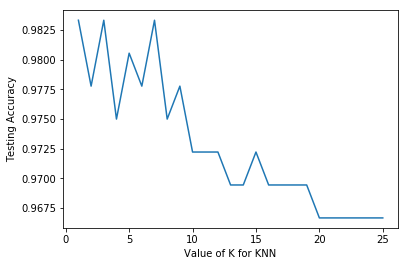

In [7]:
print(metrics.confusion_matrix(y_test, y_pred))

# plot the relationship between K and testing accuracy
plt.figure()
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()
